In [10]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# MySQL 접속 정보
HOST = "localhost"
PORT = 3306
USER = "root"
PASSWORD = "Abcd1234!"  
DB = "seoul"

In [3]:
# 엔진 생성 (utf8mb4 필수)
engine = create_engine(
    f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB}?charset=utf8mb4"
)

In [4]:
# 테스트 쿼리 (연결 확인)
test_df = pd.read_sql("SELECT 1 AS ok", engine)
print(test_df)

   ok
0   1


In [16]:
# mart_sales_dong_quarter 가져오기 
df_sales = pd.read_sql("""
SELECT *
FROM mart_sales_dong_quarter
""", engine)

In [7]:
df_sales.head(2)

,기준_년분기_코드,행정동_코드,총_매출_금액,총_매출_건수,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,시간대_00_06_매출_금액,시간대_06_11_매출_금액,시간대_11_14_매출_금액,시간대_14_17_매출_금액,시간대_17_21_매출_금액,시간대_21_24_매출_금액,load_ts
0,2023Q1,11110515,25095837542,1198412,19158444409,5937393133,8186399644,14726437457,162886592,2231166853,8400076484,6155675922,6380071504,1765960187,2026-01-17 06:52:33
1,2023Q1,11110530,96882252207,4242091,79097917568,17784334639,39082262162,36022975661,1729961506,6712039549,32087356131,15503022511,29417780787,11432091723,2026-01-17 06:52:33


In [17]:
df_sales.groupby("기준_년분기_코드")["총_매출_금액"].sum().sort_index()

기준_년분기_코드
2023Q1    25720398614352
2023Q2    25784758561996
2023Q3    25723544962340
2023Q4    27096312763134
2024Q1    25913891074520
2024Q2    25900325059909
2024Q3    25628281046278
2024Q4    26621859465695
2025Q1    25036425038435
2025Q2    25433647412663
Name: 총_매출_금액, dtype: int64

In [18]:
# 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
# 출처: https://giveme-happyending.tistory.com/168 [소연의_개발일지:티스토리]

### 분기별 서울 전체 총매출 추이

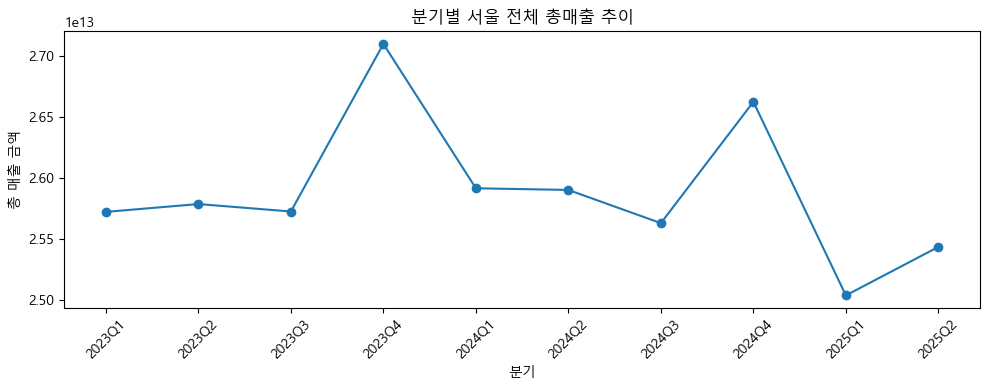

In [19]:
# 분기별 총매출 합계
trend = (df_sales.groupby("기준_년분기_코드")["총_매출_금액"]
         .sum()
         .sort_index())

plt.figure(figsize=(10, 4))
plt.plot(trend.index, trend.values, marker="o")
plt.xticks(rotation=45)
plt.title("분기별 서울 전체 총매출 추이")
plt.xlabel("분기")
plt.ylabel("총 매출 금액")
plt.tight_layout()
plt.show()


### 특정 분기 Top10 행정동 매출

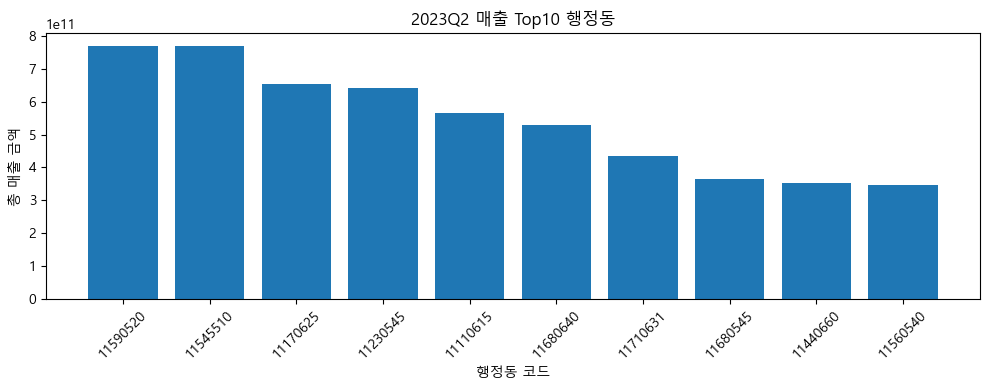

In [22]:
# 2023Q2 Top10
target_quarter = "2023Q2"

top10 = (df_sales[df_sales["기준_년분기_코드"] == target_quarter]
         .sort_values("총_매출_금액", ascending=False)
         .head(10))

plt.figure(figsize=(10, 4))
plt.bar(top10["행정동_코드"].astype(str), top10["총_매출_금액"])
plt.xticks(rotation=45)
plt.title(f"{target_quarter} 매출 Top10 행정동")
plt.xlabel("행정동 코드")
plt.ylabel("총 매출 금액")
plt.tight_layout()
plt.show()

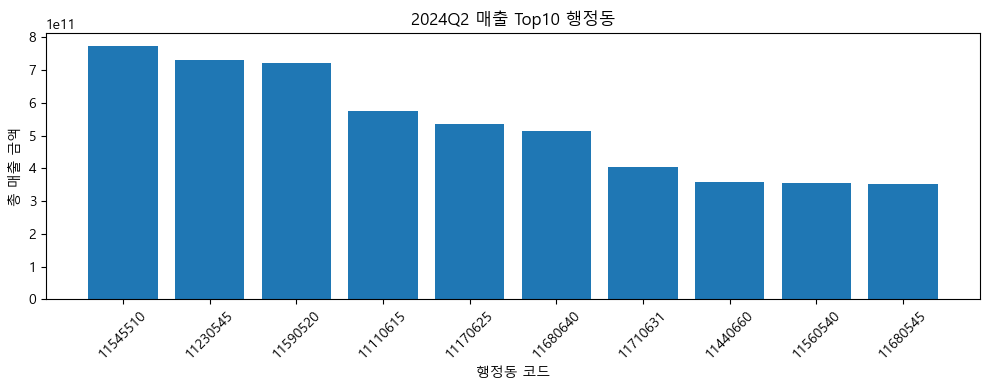

In [20]:
# 2024Q2 Top10
target_quarter = "2024Q2"

top10 = (df_sales[df_sales["기준_년분기_코드"] == target_quarter]
         .sort_values("총_매출_금액", ascending=False)
         .head(10))

plt.figure(figsize=(10, 4))
plt.bar(top10["행정동_코드"].astype(str), top10["총_매출_금액"])
plt.xticks(rotation=45)
plt.title(f"{target_quarter} 매출 Top10 행정동")
plt.xlabel("행정동 코드")
plt.ylabel("총 매출 금액")
plt.tight_layout()
plt.show()

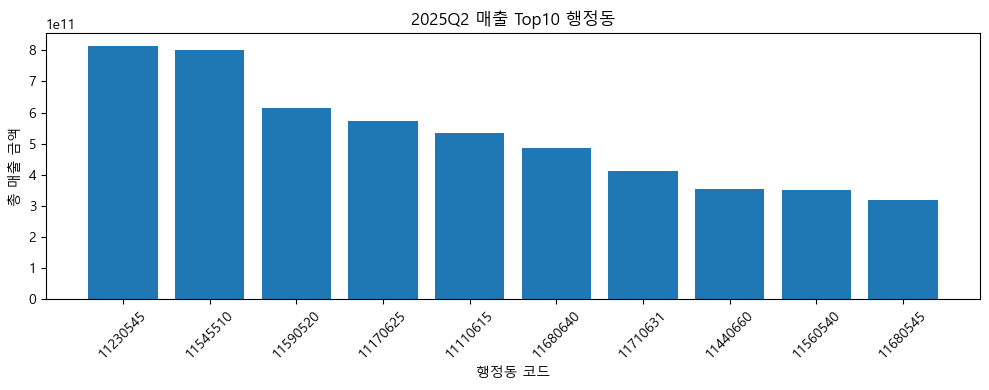

In [21]:
# 2025Q2 Top10
target_quarter = "2025Q2"

top10 = (df_sales[df_sales["기준_년분기_코드"] == target_quarter]
         .sort_values("총_매출_금액", ascending=False)
         .head(10))

plt.figure(figsize=(10, 4))
plt.bar(top10["행정동_코드"].astype(str), top10["총_매출_금액"])
plt.xticks(rotation=45)
plt.title(f"{target_quarter} 매출 Top10 행정동")
plt.xlabel("행정동 코드")
plt.ylabel("총 매출 금액")
plt.tight_layout()
plt.show()

### 유동인구 대비 매출 효율 Top10

In [23]:
query = """
SELECT
  a.기준분기,
  a.행정동코드,
  a.유동인구_분기평균,
  s.총_매출_금액,
  s.총_매출_건수,
  CASE
    WHEN a.유동인구_분기평균 IS NULL OR a.유동인구_분기평균 = 0 THEN NULL
    ELSE s.총_매출_금액 / a.유동인구_분기평균
  END AS 매출효율_금액
FROM agg_livingpop_dong_quarter a
JOIN mart_sales_dong_quarter s
  ON s.행정동_코드 = a.행정동코드
 AND s.기준_년분기_코드 = a.기준분기
"""

In [24]:
df_eff = pd.read_sql(query, engine)
df_eff.head()

,기준분기,행정동코드,유동인구_분기평균,총_매출_금액,총_매출_건수,매출효율_금액
0,2023Q1,11110515,1499.194467,25095837542,1198412,1.673955e+07
1,2023Q2,11110515,1685.944433,26764446724,1401331,1.587505e+07
2,2023Q3,11110515,1243.138900,24497389805,1283116,1.970608e+07
3,2023Q4,11110515,1565.833350,26610829822,1296550,1.699468e+07
4,2024Q1,11110515,1299.319467,24605344212,1152442,1.893710e+07


In [ ]:
# Top10 뽑기 (특정 분기 기준)

In [25]:
target_quarter = "2024Q2"

top10_eff = (df_eff[df_eff["기준분기"] == target_quarter]
             .dropna(subset=["매출효율_금액"])
             .sort_values("매출효율_금액", ascending=False)
             .head(10))

top10_eff

,기준분기,행정동코드,유동인구_분기평균,총_매출_금액,총_매출_건수,매출효율_금액
2985,2024Q2,11590520,1342.666700,722073160338,9243417,5.377903e+08
815,2024Q2,11230545,1677.125033,732322194214,26461925,4.366533e+08
3885,2024Q2,11710631,1691.958333,405497475831,6354376,2.396616e+08
1495,2024Q2,11320700,290.583333,54356424771,1635825,1.870597e+08
2265,2024Q2,11470610,149.749967,21349540873,937466,1.425679e+08
4035,2024Q2,11740540,605.888900,83912778079,2864983,1.384953e+08
1925,2024Q2,11410640,434.611133,56916156089,2492272,1.309588e+08
125,2024Q2,11110670,561.013900,69290773407,2537319,1.235099e+08
285,2024Q2,11140650,254.430567,29592878803,1195907,1.163102e+08
2975,2024Q2,11590510,2612.958333,296333014953,6683933,1.134090e+08


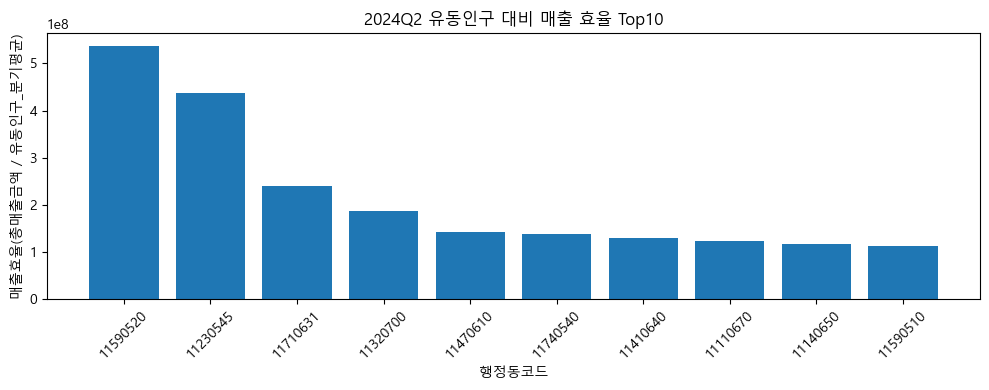

In [26]:
plt.figure(figsize=(10, 4))
plt.bar(top10_eff["행정동코드"].astype(str), top10_eff["매출효율_금액"])
plt.xticks(rotation=45)
plt.title(f"{target_quarter} 유동인구 대비 매출 효율 Top10")
plt.xlabel("행정동코드")
plt.ylabel("매출효율(총매출금액 / 유동인구_분기평균)")
plt.tight_layout()
plt.show()

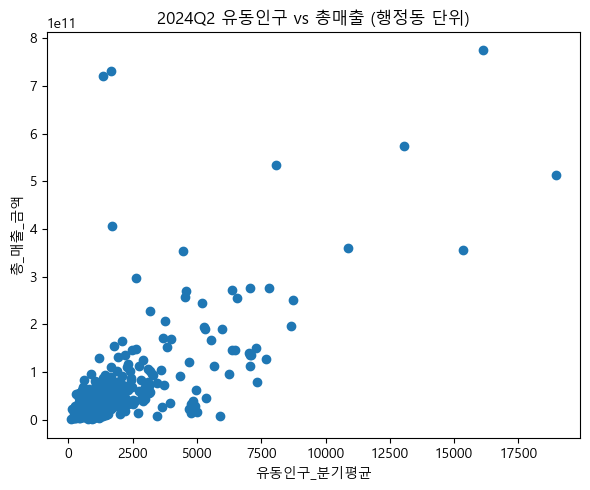

In [27]:
df_q = df_eff[df_eff["기준분기"] == target_quarter].dropna(subset=["유동인구_분기평균", "총_매출_금액"])

plt.figure(figsize=(6, 5))
plt.scatter(df_q["유동인구_분기평균"], df_q["총_매출_금액"])
plt.title(f"{target_quarter} 유동인구 vs 총매출 (행정동 단위)")
plt.xlabel("유동인구_분기평균")
plt.ylabel("총_매출_금액")
plt.tight_layout()
plt.show()

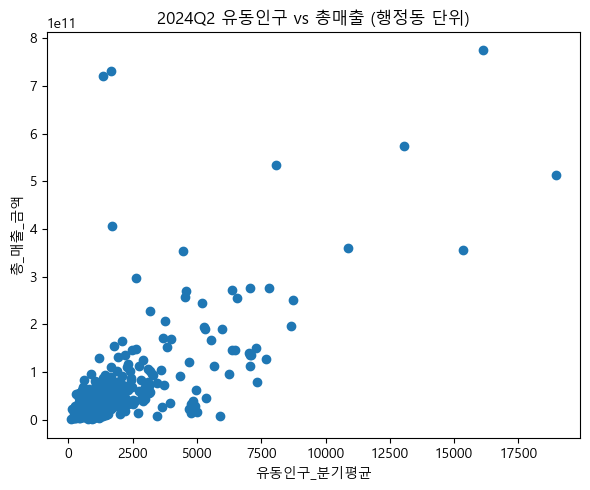

In [28]:
df_q = df_eff[df_eff["기준분기"] == target_quarter].dropna(subset=["유동인구_분기평균", "총_매출_금액"])

plt.figure(figsize=(6, 5))
plt.scatter(df_q["유동인구_분기평균"], df_q["총_매출_금액"])
plt.title(f"{target_quarter} 유동인구 vs 총매출 (행정동 단위)")
plt.xlabel("유동인구_분기평균")
plt.ylabel("총_매출_금액")
plt.tight_layout()
plt.show()